In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# with opencv

In [2]:
img = cv.imread('main.jpg',0)
img2 = img.copy()
template_list = []
for i in range(5):
    file_name = 'template'+str(i)+'.jpg'
    template = cv.imread(file_name,0)
    template_list.append(template)

## burj khalifa

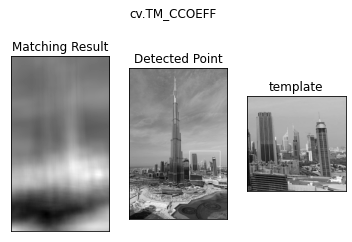

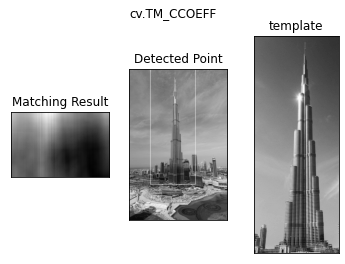

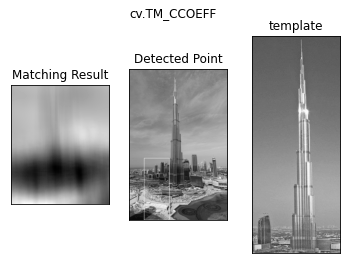

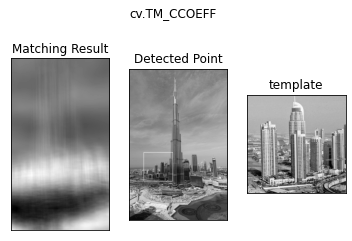

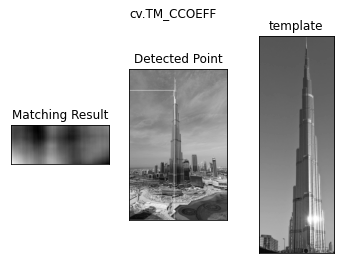

In [3]:
for template in template_list:   
    
    w, h = template.shape[::-1]
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', #'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                #'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'
              ]
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #print(min_val, max_val, min_loc, max_loc)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, 255, 2)
        plt.subplot(131),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(132),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.subplot(133),plt.imshow(template,cmap = 'gray')
        plt.title('template'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()

## table

In [4]:
img = cv.imread('main2.jpg',0)
img2 = img.copy()
template_list = []
for i in range(5):
    file_name = 'template'+str(i+5)+'.jpg'
    template = cv.imread(file_name,0)
    template_list.append(template)

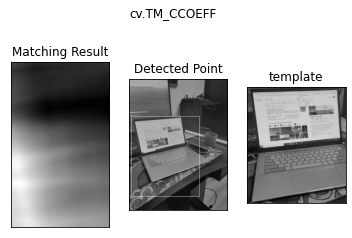

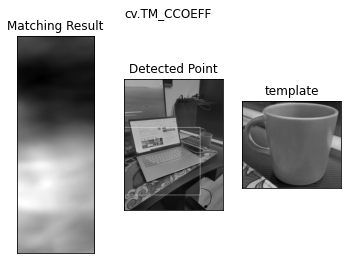

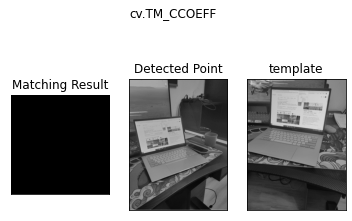

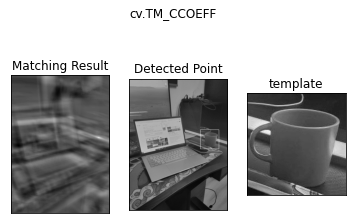

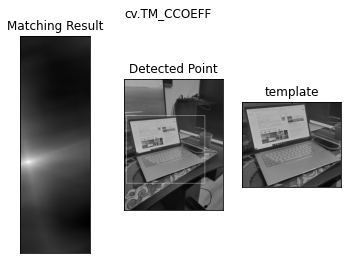

In [5]:
for template in template_list:   
    
    w, h = template.shape[::-1]
    # All the 6 methods for comparison in a list
    methods = ['cv.TM_CCOEFF', #'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
                #'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'
              ]
    for meth in methods:
        img = img2.copy()
        method = eval(meth)
        # Apply template Matching
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        #print(min_val, max_val, min_loc, max_loc)
        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img,top_left, bottom_right, 255, 2)
        plt.subplot(131),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(132),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.subplot(133),plt.imshow(template,cmap = 'gray')
        plt.title('template'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)
        plt.show()

# with ORB

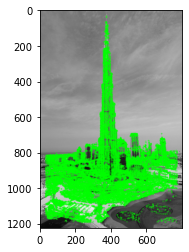

(<matplotlib.image.AxesImage at 0x1d795e38700>, None)

In [6]:
img = cv.imread('main.jpg',0)
# Initiate ORB detector
orb = cv.ORB_create(100000)
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

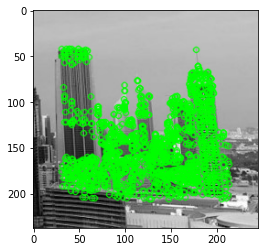

(<matplotlib.image.AxesImage at 0x1d7957eb580>, None)

In [7]:
img = cv.imread('template0.jpg',0)
# Initiate ORB detector
orb = cv.ORB_create(10000)
# find the keypoints with ORB
kp2 = orb.detect(img,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img, kp2)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp2, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

In [8]:
img1 = cv.imread('main.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('template0.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create(10000)
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [9]:
len(des2)

1589

In [10]:
len(des1)

9859

**Следуюящая переменная отвечает за количество пар точек с наименьшим расстоянием между друг другом. Эти точки используются для построения прямоуголника, отвечающего за наиболее вероятное совпадение областей**

In [11]:
n_points_to_take = 100

## burj khalifa

In [12]:
img1 = cv.imread('main.jpg',cv.IMREAD_GRAYSCALE)
template_list = []
for i in range(5):
    file_name = 'template'+str(i)+'.jpg'
    template = cv.imread(file_name,cv.IMREAD_GRAYSCALE)
    template_list.append(template)

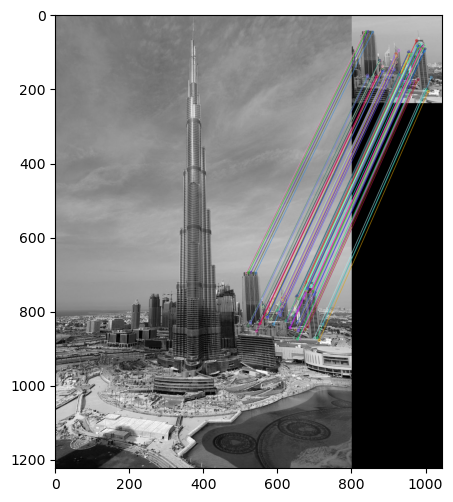

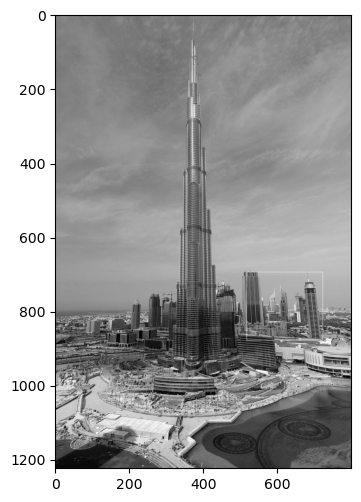

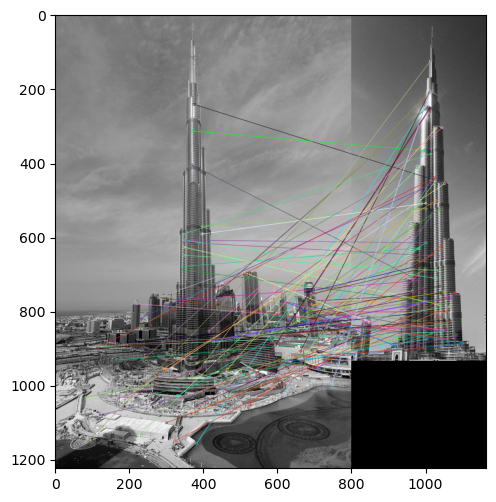

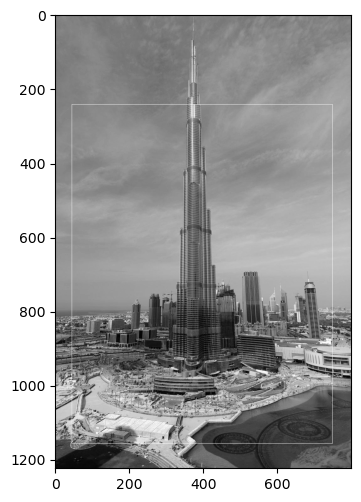

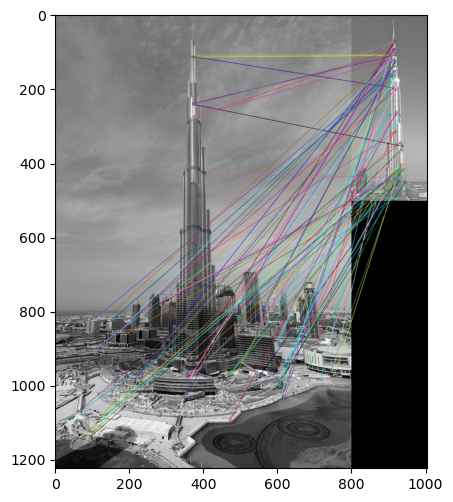

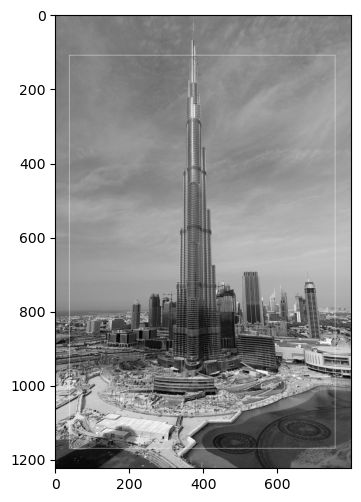

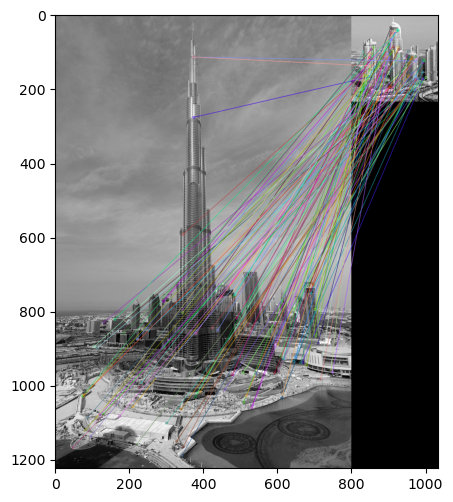

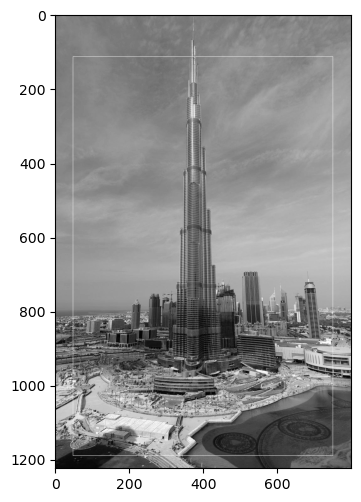

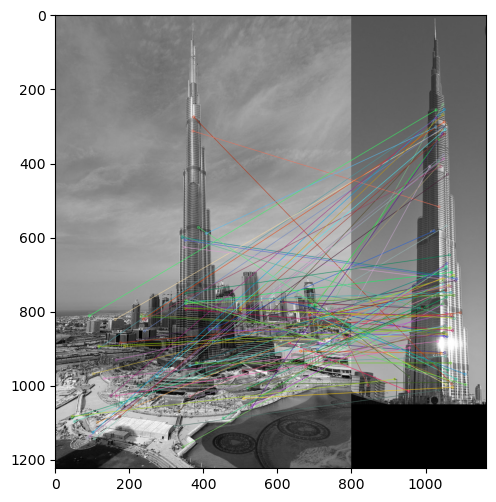

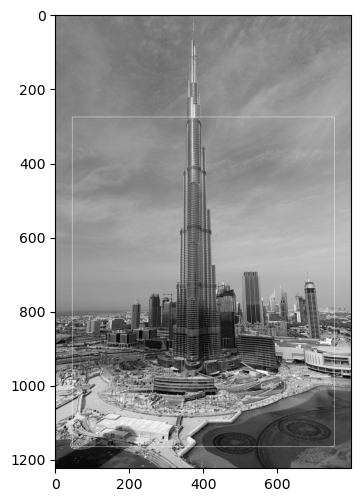

In [13]:
for template in template_list: 
    
    #img1 = cv.imread('main.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
    #img2 = cv.imread('template0.jpg',cv.IMREAD_GRAYSCALE) # trainImage
    # Initiate ORB detector
    orb = cv.ORB_create(10000)
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(template,None)
    
    # create BFMatcher object
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # Draw first 10 matches.
    img3 = cv.drawMatches(img1,kp1,template,kp2,matches[:n_points_to_take],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(img3),plt.show()

    point_list = []
    for m in matches[:n_points_to_take]:
        point_list.append(m.queryIdx)
    c_list = cv.KeyPoint_convert(kp1)
    needed_c_list = []
    for p in point_list:
        needed_c_list.append(c_list[p])

    df = pd.DataFrame(needed_c_list, columns=['x','y'])
    y_max, y_min = int(df.y.max()),int(df.y.min())
    x_max, x_min = int(df.x.max()),int(df.x.min())
    img_to_show = img1.copy()
    img4 = cv.rectangle(img_to_show, (x_max,y_max), (x_min,y_min),color=(255, 55, 0))
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(img4,cmap='gray'),plt.show()

## table

In [14]:
img1 = cv.imread('main2.jpg',cv.IMREAD_GRAYSCALE)
template_list = []
for i in range(5):
    file_name = 'template'+str(i+5)+'.jpg'
    template = cv.imread(file_name,cv.IMREAD_GRAYSCALE)
    template_list.append(template)

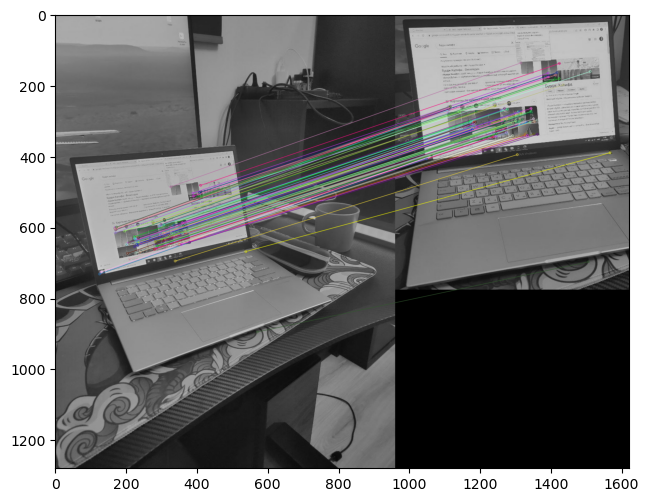

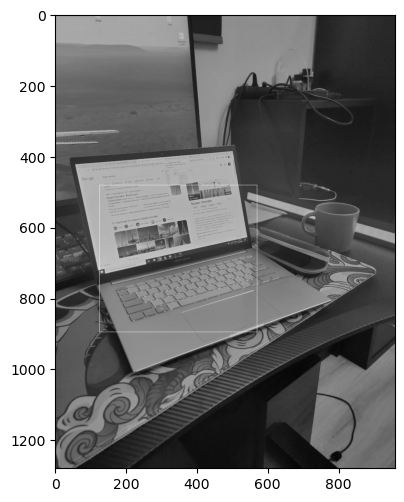

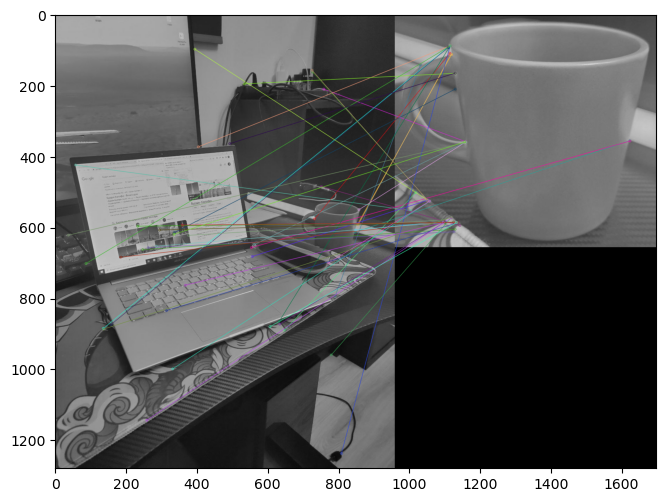

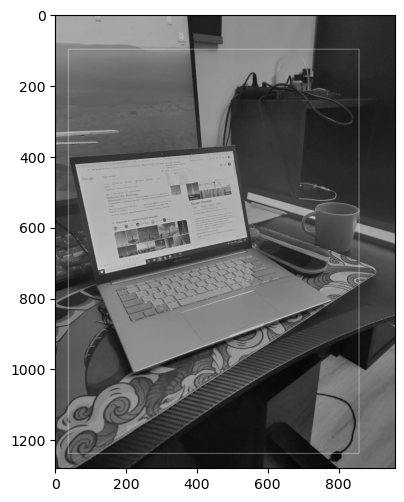

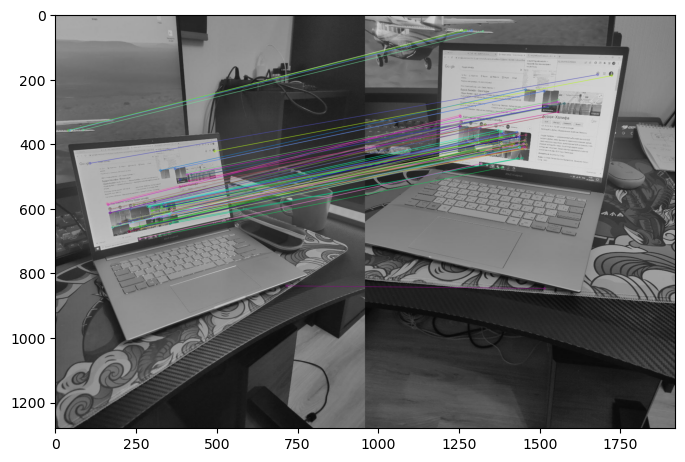

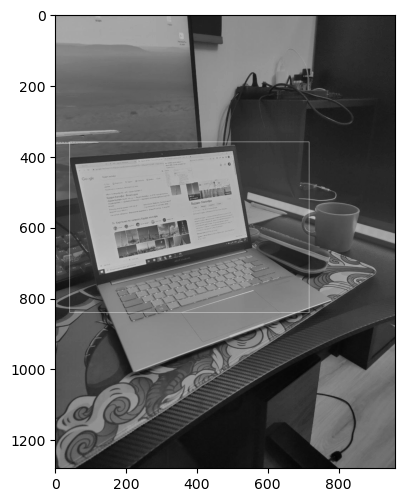

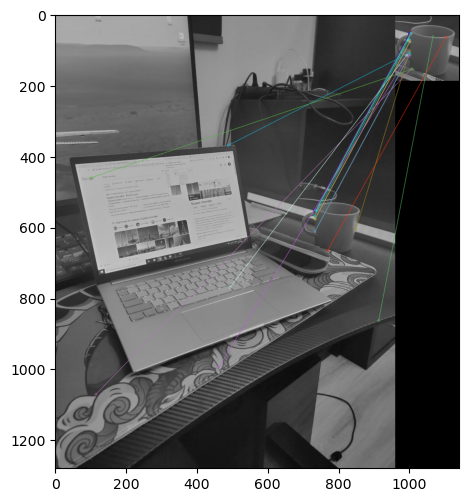

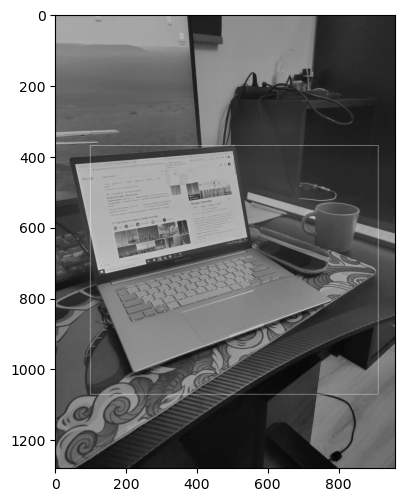

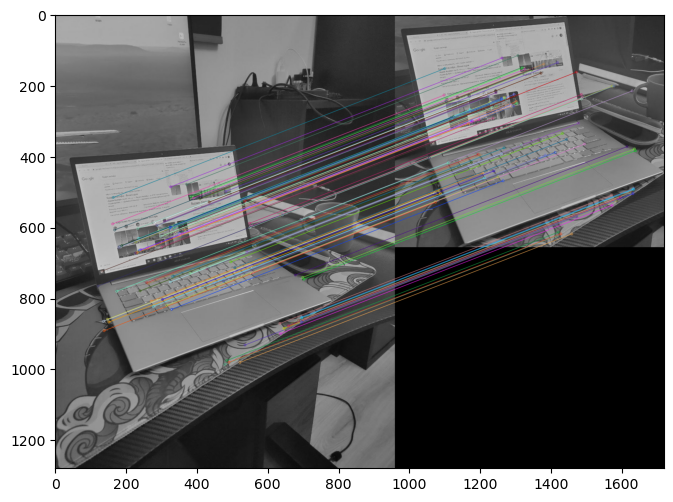

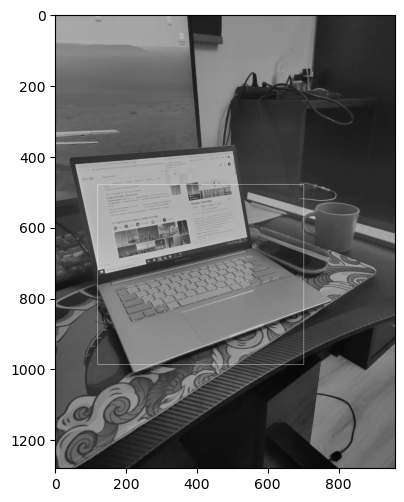

In [15]:
for template in template_list: 
    
    #img1 = cv.imread('main.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
    #img2 = cv.imread('template0.jpg',cv.IMREAD_GRAYSCALE) # trainImage
    # Initiate ORB detector
    orb = cv.ORB_create(10000)
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(template,None)
    
    # create BFMatcher object
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # Draw first 10 matches.
    img3 = cv.drawMatches(img1,kp1,template,kp2,matches[:n_points_to_take],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(img3),plt.show()

    point_list = []
    for m in matches[:n_points_to_take]:
        point_list.append(m.queryIdx)
    c_list = cv.KeyPoint_convert(kp1)
    needed_c_list = []
    for p in point_list:
        needed_c_list.append(c_list[p])

    df = pd.DataFrame(needed_c_list, columns=['x','y'])
    y_max, y_min = int(df.y.max()),int(df.y.min())
    x_max, x_min = int(df.x.max()),int(df.x.min())
    img_to_show = img1.copy()
    img4 = cv.rectangle(img_to_show, (x_max,y_max), (x_min,y_min),color=(255, 55, 0))
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(img4,cmap='gray'),plt.show()

## notebooks

In [25]:
n_points_to_take = 50

In [26]:
img1 = cv.imread('main3.jpg',cv.IMREAD_GRAYSCALE)
template_list = []
for i in range(5):
    file_name = 'template'+str(i+10)+'.jpg'
    template = cv.imread(file_name,cv.IMREAD_GRAYSCALE)
    template_list.append(template)

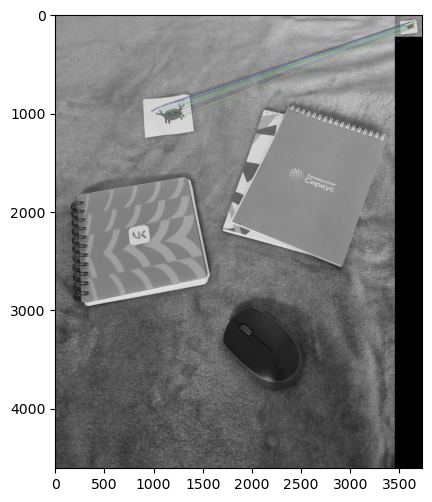

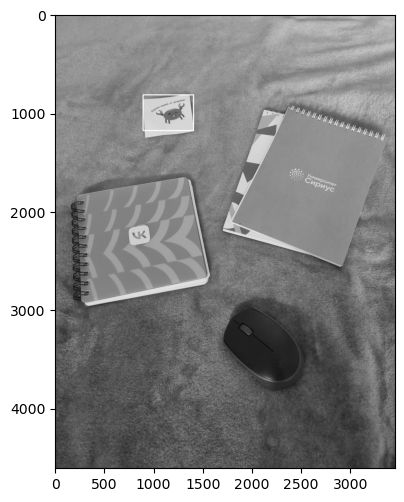

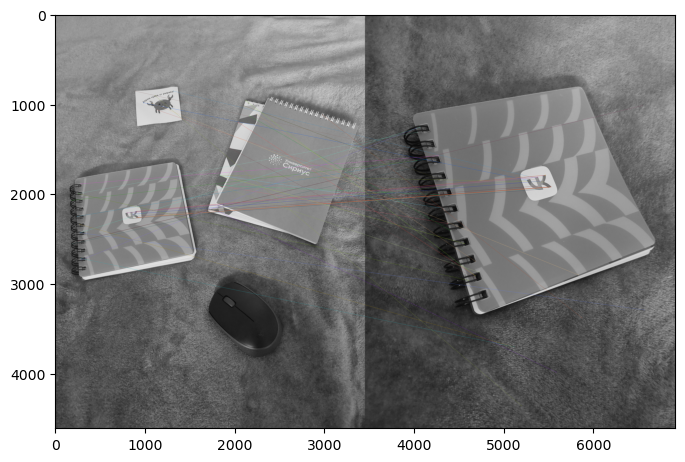

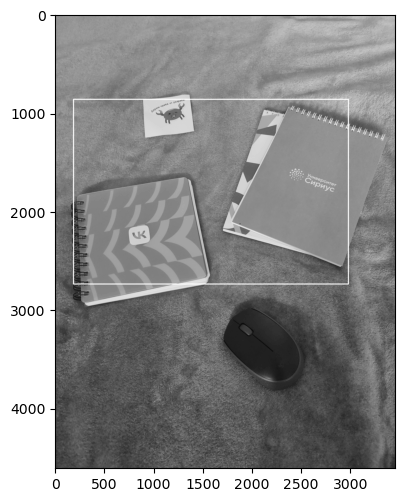

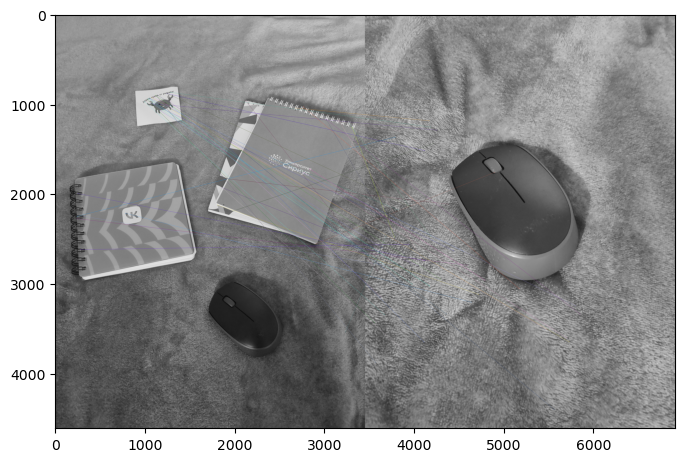

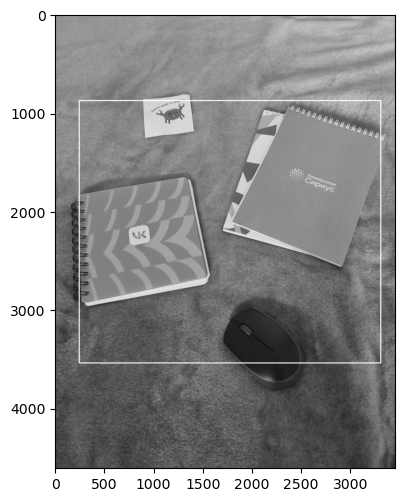

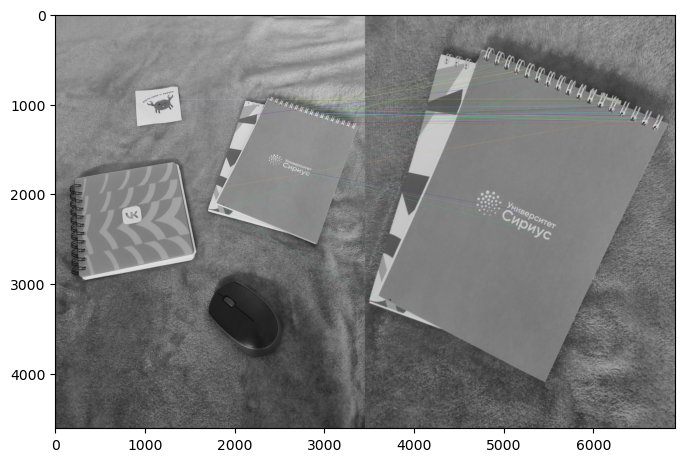

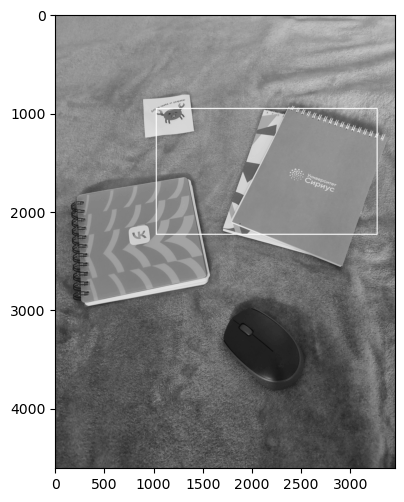

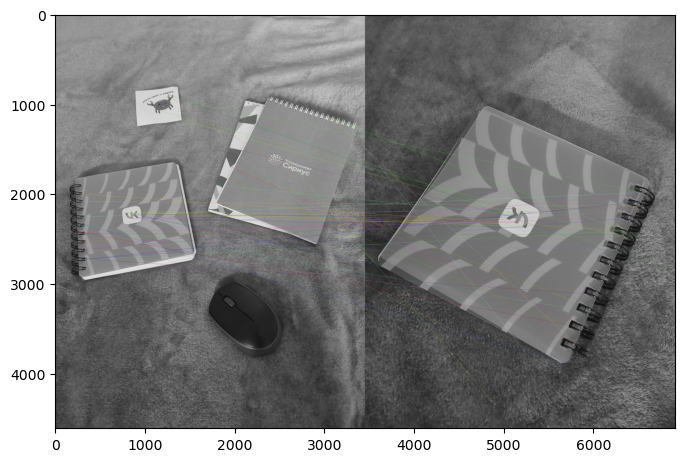

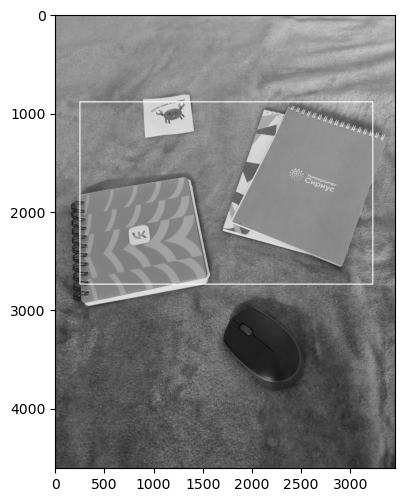

In [27]:
for template in template_list: 
    
    #img1 = cv.imread('main.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
    #img2 = cv.imread('template0.jpg',cv.IMREAD_GRAYSCALE) # trainImage
    # Initiate ORB detector
    orb = cv.ORB_create(10000)
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(template,None)
    
    # create BFMatcher object
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)
    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    # Draw first 10 matches.
    img3 = cv.drawMatches(img1,kp1,template,kp2,matches[:n_points_to_take],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(img3),plt.show()

    point_list = []
    for m in matches[:n_points_to_take]:
        point_list.append(m.queryIdx)
    c_list = cv.KeyPoint_convert(kp1)
    needed_c_list = []
    for p in point_list:
        needed_c_list.append(c_list[p])

    df = pd.DataFrame(needed_c_list, columns=['x','y'])
    y_max, y_min = int(df.y.max()),int(df.y.min())
    x_max, x_min = int(df.x.max()),int(df.x.min())
    img_to_show = img1.copy()
    img4 = cv.rectangle(img_to_show, (x_max,y_max), (x_min,y_min),color=(255, 55, 0),thickness=10)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.imshow(img4,cmap='gray'),plt.show()

 **Как можно видеть, matching точек, полученный методом ORB хорошо работает с квадратами и другими фигурами, где есть углы. Но посредственно работает с остальными точками.**